In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('data/games0108.csv', sep=',')
pred_df = pd.read_csv('data/pred0108.csv')

In [31]:
df_id = df['fortlfd']
pred_id = pred_df['fortlfd']

df = df.drop("fortlfd", axis = 1)
pred_df = pred_df.drop("fortlfd", axis = 1)

df.shape, pred_df.shape

((522, 17), (6, 17))

In [32]:
df.head()

,contest,year,month,day,time,break,hoamTeam,guestTeam,resultNumeric,homeTotalGoalDiff,guestTotalGoalDiff,homeTeamGoalsDiffAtHome,homeTeamGoalsDiffAway,guestTeamGoalsDiffAtHome,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
0,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Di,20:30,45,Hibernians FC,Red Bull Salzburg,-3.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,ÖFB-Cup ÖFB-Cup,2017,7,Sa,17:00,4,Deutschlandsberger SC,Red Bull Salzburg,-7.0,0.00,3.000000,0.0,0.0,0.0,3.0,0.0,3.0
2,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Mi,20:30,4,Red Bull Salzburg,Hibernians FC,3.0,5.00,-3.000000,0.0,5.0,-3.0,0.0,3.0,0.0
3,Bundesliga Bundesliga,2017,7,Sa,18:30,3,Wolfsberger AC,Red Bull Salzburg,-2.0,0.00,4.333333,0.0,0.0,3.0,5.0,0.0,3.0
4,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Mi,18:45,4,Red Bull Salzburg,HNK Rijeka,0.0,3.75,0.000000,3.0,4.0,0.0,0.0,3.0,0.0


In [33]:
pred_df.head()

,contest,year,month,day,time,break,hoamTeam,guestTeam,resultNumeric,homeTotalGoalDiff,guestTotalGoalDiff,homeTeamGoalsDiffAtHome,homeTeamGoalsDiffAway,guestTeamGoalsDiffAtHome,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
0,Bundesliga Bundesliga,2019,7,Sa,17:00,7,FK Austria Wien,LASK,NaN,0.837838,1.309524,0.611111,-0.473684,1.333333,1.285714,1.378378,2.095238
1,Bundesliga Bundesliga,2019,7,Sa,17:00,6,SC Rheindorf Altach,WSG Tirol,NaN,0.600000,-0.500000,-0.294118,0.444444,2.000000,-3.000000,1.200000,1.500000
2,Bundesliga Bundesliga,2019,7,Sa,17:00,6,TSV Hartberg,FC Admira Wacker Mödling,NaN,0.888889,-0.857143,0.166667,-1.111111,-0.705882,-1.000000,1.166667,0.857143
3,Bundesliga Bundesliga,2020,7,So,17:00,9,Red Bull Salzburg,SV Mattersburg,NaN,2.283019,-0.117647,2.125000,1.448276,0.058824,-0.294118,2.509434,1.441176
4,Bundesliga Bundesliga,2019,7,So,17:00,8,Wolfsberger AC,SK Sturm Graz,NaN,0.861111,-0.282051,0.333333,-0.055556,-0.210526,-0.350000,1.527778,1.179487


In [34]:
df_id.head()

0    1
1    2
2    3
3    4
4    5
Name: fortlfd, dtype: int64

In [35]:
pred_id.head()

0    523
1    524
2    525
3    526
4    527
Name: fortlfd, dtype: int64

In [36]:
# df['result'] = np.where(df.resultNumeric < 0, 'lost', np.where(df.resultNumeric > 0, 'won', 'draw'))

In [38]:
y_reg = df.resultNumeric
y_cat = (pd.get_dummies(np.where(df.resultNumeric < 0, 'lost', np.where(df.resultNumeric > 0, 'won', 'draw'))))

In [39]:
ndf = df.shape[0]
npred = pred_df.shape[0]


df = pd.concat([df, pred_df])
df = df.drop(['resultNumeric'], axis=1)

df.shape

(528, 16)

In [50]:
ndf, npred

(522, 6)

In [41]:
df.head()

,year,month,day,time,break,hoamTeam,guestTeam,homeTotalGoalDiff,guestTotalGoalDiff,homeTeamGoalsDiffAtHome,...,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints,Bundesliga Bundesliga,Europa League Qualifikation Europa League Qualifikation,Europa League Europa League,Relegation Hinspiele,Relegation Rückspiele,UEFA CL-Qualifikation UEFA Champions League-Qualifikation,ÖFB-Cup ÖFB-Cup
0,2017,7,Di,20:30,45,Hibernians FC,Red Bull Salzburg,0.00,0.000000,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
1,2017,7,Sa,17:00,4,Deutschlandsberger SC,Red Bull Salzburg,0.00,3.000000,0.0,...,3.0,0.0,3.0,0,0,0,0,0,0,1
2,2017,7,Mi,20:30,4,Red Bull Salzburg,Hibernians FC,5.00,-3.000000,0.0,...,0.0,3.0,0.0,0,0,0,0,0,1,0
3,2017,7,Sa,18:30,3,Wolfsberger AC,Red Bull Salzburg,0.00,4.333333,0.0,...,5.0,0.0,3.0,1,0,0,0,0,0,0
4,2017,7,Mi,18:45,4,Red Bull Salzburg,HNK Rijeka,3.75,0.000000,3.0,...,0.0,3.0,0.0,0,0,0,0,0,1,0


In [10]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [40]:
df_contest = pd.get_dummies(df.contest)
df = pd.concat([df, df_contest], axis=1)
df = df.drop('contest', axis=1)

In [42]:
df_day = pd.get_dummies(df.day)
df = pd.concat([df, df_day], axis=1)
df = df.drop('day', axis=1)

In [43]:
df_time = pd.get_dummies(df.time)
df = pd.concat([df, df_time], axis=1)
df = df.drop('time', axis=1)

In [44]:
df_hoamTeam = pd.get_dummies(df.hoamTeam)
df = pd.concat([df, df_hoamTeam], axis=1)
df = df.drop('hoamTeam', axis=1)

In [45]:
df_guestTeam = pd.get_dummies(df.guestTeam)
df = pd.concat([df, df_guestTeam], axis=1)
df = df.drop('guestTeam', axis=1)

In [46]:
df.shape

(528, 190)

In [47]:
df

,year,month,break,homeTotalGoalDiff,guestTotalGoalDiff,homeTeamGoalsDiffAtHome,homeTeamGoalsDiffAway,guestTeamGoalsDiffAtHome,guestTeamGoalsDiffAway,hoamAvgPoints,...,SV Ried,SV Wimpassing,Shkendija Tetovo,Slovan Bratislava,Spartak Moskau,TSV Hartberg,Vitória Guimarães SC,WSG Tirol,Wolfsberger AC,ZSKA Sofia
0,2017,7,45,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,2017,7,4,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,2017,7,4,5.000000,-3.000000,0.000000,5.000000,-3.000000,0.000000,3.000000,...,0,0,0,0,0,0,0,0,0,0
3,2017,7,3,0.000000,4.333333,0.000000,0.000000,3.000000,5.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,2017,7,4,3.750000,0.000000,3.000000,4.000000,0.000000,0.000000,3.000000,...,0,0,0,0,0,0,0,0,0,0
5,2017,7,3,3.000000,0.000000,1.500000,4.000000,0.000000,0.000000,2.600000,...,0,0,0,0,0,0,0,0,0,0
6,2017,8,4,1.000000,2.500000,0.000000,0.000000,1.000000,4.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
7,2017,8,3,2.142857,0.000000,1.000000,3.000000,0.000000,0.000000,2.142857,...,0,0,0,0,0,0,0,0,0,0
8,2017,8,7,0.000000,2.375000,0.000000,0.000000,1.750000,3.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
9,2017,8,5,0.000000,2.222222,0.000000,0.000000,1.750000,2.600000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 5
Columns: 190 entries, year to ZSKA Sofia
dtypes: float64(8), int64(3), uint8(179)
memory usage: 141.8 KB


In [51]:
X = df[:ndf]
pred_df = df[ndf:]

In [53]:
X.shape, pred_df.shape

((522, 190), (6, 190))

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
    X, y_reg, y_cat, test_size=0.2, random_state=123)

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input, BatchNormalization
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_monitor = EarlyStopping(patience=4)

In [113]:
model_save = ModelCheckpoint('best_model.hdf5', save_best_only=True, monitor='val_Classification_acc')

In [59]:
in_cols=X_train.shape[1]
out_cols=y_cat.shape[1]

in_cols, out_cols

(190, 3)

In [60]:
model_1 = Sequential()

model_1.add(Dense(12, input_shape=(in_cols,), activation='relu', ))
model_1.add(Dense(12, activation='relu'))
model_1.add(Dense(1))


Instructions for updating:
Colocations handled automatically by placer.


In [61]:
model_1.compile(optimizer='adam', loss='mse')

In [62]:
model_1_training = model_1.fit(
    X_train_scaled,
    y_reg_train,
    validation_data=[X_test_scaled,y_reg_test],
    epochs=100
)

Instructions for updating:
Use tf.cast instead.
Train on 417 samples, validate on 105 samples
Epoch 1/100
417/417 [==============================] - 1s 2ms/step - loss: 5.6080 - val_loss: 4.7218
Epoch 2/100
417/417 [==============================] - 0s 175us/step - loss: 4.9306 - val_loss: 4.5254
Epoch 3/100
417/417 [==============================] - 0s 117us/step - loss: 4.5344 - val_loss: 4.4135
Epoch 4/100
417/417 [==============================] - 0s 101us/step - loss: 4.2606 - val_loss: 4.3381
Epoch 5/100
417/417 [==============================] - 0s 127us/step - loss: 4.0391 - val_loss: 4.2834
Epoch 6/100
417/417 [==============================] - 0s 101us/step - loss: 3.8493 - val_loss: 4.2279
Epoch 7/100
417/417 [==============================] - 0s 84us/step - loss: 3.6969 - val_loss: 4.1731
Epoch 8/100
417/417 [==============================] - 0s 98us/step - loss: 3.5504 - val_loss: 4.1378
Epoch 9/100
417/417 [==============================] - 0s 108us/step - loss: 3.4370 - 

417/417 [==============================] - 0s 101us/step - loss: 1.1115 - val_loss: 4.4273
Epoch 77/100
417/417 [==============================] - 0s 98us/step - loss: 1.0925 - val_loss: 4.4445
Epoch 78/100
417/417 [==============================] - 0s 98us/step - loss: 1.0790 - val_loss: 4.4559
Epoch 79/100
417/417 [==============================] - 0s 105us/step - loss: 1.0787 - val_loss: 4.4446
Epoch 80/100
417/417 [==============================] - 0s 103us/step - loss: 1.0536 - val_loss: 4.4084
Epoch 81/100
417/417 [==============================] - 0s 89us/step - loss: 1.0318 - val_loss: 4.4230
Epoch 82/100
417/417 [==============================] - 0s 127us/step - loss: 1.0146 - val_loss: 4.4183
Epoch 83/100
417/417 [==============================] - 0s 101us/step - loss: 1.0025 - val_loss: 4.4320
Epoch 84/100
417/417 [==============================] - 0s 108us/step - loss: 0.9927 - val_loss: 4.4337
Epoch 85/100
417/417 [==============================] - 0s 127us/step - loss: 0.

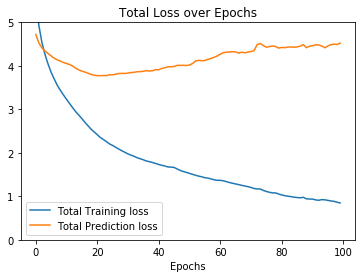

In [63]:
plt.plot(model_1_training.history['loss'])
plt.xlabel('Epochs')
plt.ylim([0, 5])
plt.title('Total Loss over Epochs')
plt.plot(model_1_training.history['val_loss'])
plt.legend(['Total Training loss', 'Total Prediction loss'])

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [65]:
rfr = RandomForestRegressor(n_estimators=1000)

rfr.fit(X_train, y_reg_train)
rfr.score(X_train, y_reg_train)

0.8883798360330054

In [66]:
rfr.score(X_test, y_reg_test)
pred_y = rfr.predict(X_test)

In [67]:
np.sqrt(mean_squared_error(np.exp(y_reg_test), np.exp(pred_y)))

13.606651259216617

In [68]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(8, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(16, activation='relu', name='hidden_2')(batch_1)
batch_2 = BatchNormalization()(hidden_2)
hidden_3 = Dense(16, activation='relu', name='hidden_3')(batch_2)
output_tensor_reg = Dense(1, name='Regression')(hidden_3)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [69]:
model_2 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [70]:
model_2.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [71]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 190)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 8)                 1528      
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
hidden_2 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
hidden_3 (Dense)             (None, 16)                272       
_________________________________________________________________
Regression (Dense)           (None, 1)                 17        
__________

In [72]:
model_2_training = model_2.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    callbacks=[early_stopping_monitor],
    verbose=True)

Train on 417 samples, validate on 105 samples
Epoch 1/50
417/417 [==============================] - 4s 9ms/step - loss: 5.6825 - Regression_loss: 4.5883 - Classification_loss: 1.0943 - Regression_acc: 0.2158 - Classification_acc: 0.3981 - val_loss: 31897.7405 - val_Regression_loss: 31888.5079 - val_Classification_loss: 9.2327 - val_Regression_acc: 0.0000e+00 - val_Classification_acc: 0.3333
Epoch 2/50
417/417 [==============================] - 2s 5ms/step - loss: 5.6661 - Regression_loss: 4.5819 - Classification_loss: 1.0843 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 35862.7238 - val_Regression_loss: 35853.6377 - val_Classification_loss: 9.0862 - val_Regression_acc: 0.0000e+00 - val_Classification_acc: 0.3333
Epoch 3/50
417/417 [==============================] - 2s 5ms/step - loss: 5.6541 - Regression_loss: 4.5767 - Classification_loss: 1.0774 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 31456.0774 - val_Regression_loss: 31446.7893 - val_Clas

In [73]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(in_cols, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(in_cols, activation='relu', name='hidden_2')(batch_1)
output_tensor_reg = Dense(1, name='Regression')(hidden_2)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [74]:
model_3 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [75]:
model_3.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [76]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 190)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 190)               36290     
_________________________________________________________________
batch_normalization_3 (Batch (None, 190)               760       
_________________________________________________________________
hidden_2 (Dense)             (None, 190)               36290     
_________________________________________________________________
Regression (Dense)           (None, 1)                 191       
_________________________________________________________________
Classification (Dense)       (None, 3)                 6         
Total params: 73,537
Trainable params: 73,157
Non-trainable params: 380
_________________________________________________________________


In [77]:
model_3_training = model_3.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=100,
    #callbacks=[early_stopping_monitor],
    verbose=True)

Train on 417 samples, validate on 105 samples
Epoch 1/100
417/417 [==============================] - 7s 16ms/step - loss: 5.6838 - Regression_loss: 4.5895 - Classification_loss: 1.0943 - Regression_acc: 0.2158 - Classification_acc: 0.3813 - val_loss: 87.5600 - val_Regression_loss: 84.6205 - val_Classification_loss: 2.9395 - val_Regression_acc: 0.0476 - val_Classification_acc: 0.4190
Epoch 2/100
417/417 [==============================] - 4s 9ms/step - loss: 5.6701 - Regression_loss: 4.5832 - Classification_loss: 1.0869 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 88.7921 - val_Regression_loss: 85.8371 - val_Classification_loss: 2.9550 - val_Regression_acc: 0.0000e+00 - val_Classification_acc: 0.3810
Epoch 3/100
417/417 [==============================] - 4s 10ms/step - loss: 5.6609 - Regression_loss: 4.5801 - Classification_loss: 1.0808 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 91.1685 - val_Regression_loss: 88.2271 - val_Classification_loss: 

417/417 [==============================] - 3s 8ms/step - loss: 5.6336 - Regression_loss: 4.5700 - Classification_loss: 1.0636 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 87.3878 - val_Regression_loss: 84.5992 - val_Classification_loss: 2.7886 - val_Regression_acc: 0.0286 - val_Classification_acc: 0.4286
Epoch 24/100
417/417 [==============================] - 3s 8ms/step - loss: 5.6336 - Regression_loss: 4.5698 - Classification_loss: 1.0638 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 92.1896 - val_Regression_loss: 89.1837 - val_Classification_loss: 3.0059 - val_Regression_acc: 0.0190 - val_Classification_acc: 0.4286
Epoch 25/100
417/417 [==============================] - 3s 8ms/step - loss: 5.6342 - Regression_loss: 4.5703 - Classification_loss: 1.0639 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 93.0645 - val_Regression_loss: 90.0834 - val_Classification_loss: 2.9811 - val_Regression_acc: 0.0000e+00 - val_Classification_a

417/417 [==============================] - 2s 6ms/step - loss: 5.6330 - Regression_loss: 4.5695 - Classification_loss: 1.0635 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 90.0260 - val_Regression_loss: 87.1093 - val_Classification_loss: 2.9167 - val_Regression_acc: 0.0286 - val_Classification_acc: 0.4381
Epoch 48/100
417/417 [==============================] - 2s 6ms/step - loss: 5.6334 - Regression_loss: 4.5697 - Classification_loss: 1.0637 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 89.2652 - val_Regression_loss: 86.4288 - val_Classification_loss: 2.8363 - val_Regression_acc: 0.0190 - val_Classification_acc: 0.4190
Epoch 49/100
417/417 [==============================] - 2s 6ms/step - loss: 5.6338 - Regression_loss: 4.5701 - Classification_loss: 1.0637 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 88.3752 - val_Regression_loss: 85.6516 - val_Classification_loss: 2.7235 - val_Regression_acc: 0.0286 - val_Classification_acc: 

417/417 [==============================] - 2s 5ms/step - loss: 5.6332 - Regression_loss: 4.5696 - Classification_loss: 1.0636 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 88.7518 - val_Regression_loss: 85.9180 - val_Classification_loss: 2.8338 - val_Regression_acc: 0.0571 - val_Classification_acc: 0.4286
Epoch 72/100
417/417 [==============================] - ETA: 0s - loss: 5.6496 - Regression_loss: 4.5836 - Classification_loss: 1.0660 - Regression_acc: 0.2195 - Classification_acc: 0.417 - 2s 6ms/step - loss: 5.6333 - Regression_loss: 4.5696 - Classification_loss: 1.0637 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 89.1888 - val_Regression_loss: 86.4122 - val_Classification_loss: 2.7765 - val_Regression_acc: 0.0286 - val_Classification_acc: 0.4095
Epoch 73/100
417/417 [==============================] - 2s 6ms/step - loss: 5.6337 - Regression_loss: 4.5700 - Classification_loss: 1.0637 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_

Epoch 95/100
417/417 [==============================] - 2s 6ms/step - loss: 5.6335 - Regression_loss: 4.5698 - Classification_loss: 1.0637 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 88.7678 - val_Regression_loss: 86.0282 - val_Classification_loss: 2.7396 - val_Regression_acc: 0.0476 - val_Classification_acc: 0.4381
Epoch 96/100
417/417 [==============================] - 2s 5ms/step - loss: 5.6331 - Regression_loss: 4.5695 - Classification_loss: 1.0637 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 88.4452 - val_Regression_loss: 85.7565 - val_Classification_loss: 2.6887 - val_Regression_acc: 0.0762 - val_Classification_acc: 0.4381
Epoch 97/100
417/417 [==============================] - 2s 6ms/step - loss: 5.6338 - Regression_loss: 4.5701 - Classification_loss: 1.0637 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 86.6780 - val_Regression_loss: 84.0714 - val_Classification_loss: 2.6066 - val_Regression_acc: 0.0190 - val_Classif

In [78]:
model_3.predict(X_test_scaled)[0][6][0], model_3.predict(X_test_scaled)[1][6]

(3.3105278, array([0.18828124, 0.11639625, 0.9840112 ], dtype=float32))

In [79]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(in_cols*2, activation='relu', name='hidden_1')(input_tensor)
output_tensor_reg = Dense(1, name='Regression')(hidden_1)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [80]:
model_4 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [81]:
model_4.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [82]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 190)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 380)               72580     
_________________________________________________________________
Regression (Dense)           (None, 1)                 381       
_________________________________________________________________
Classification (Dense)       (None, 3)                 6         
Total params: 72,967
Trainable params: 72,967
Non-trainable params: 0
_________________________________________________________________


In [114]:
model_4_training = model_4.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    callbacks=[early_stopping_monitor, model_save],
    verbose=True)

Train on 417 samples, validate on 105 samples
Epoch 1/50
417/417 [==============================] - 2s 6ms/step - loss: 0.7511 - Regression_loss: 0.4246 - Classification_loss: 0.3266 - Regression_acc: 0.6906 - Classification_acc: 0.9065 - val_loss: 6.6671 - val_Regression_loss: 4.6888 - val_Classification_loss: 1.9784 - val_Regression_acc: 0.2000 - val_Classification_acc: 0.4857
Epoch 2/50
417/417 [==============================] - 3s 6ms/step - loss: 0.7652 - Regression_loss: 0.4302 - Classification_loss: 0.3349 - Regression_acc: 0.6715 - Classification_acc: 0.8897 - val_loss: 6.6242 - val_Regression_loss: 4.5960 - val_Classification_loss: 2.0282 - val_Regression_acc: 0.2571 - val_Classification_acc: 0.4857
Epoch 3/50
417/417 [==============================] - 3s 7ms/step - loss: 0.6624 - Regression_loss: 0.3467 - Classification_loss: 0.3157 - Regression_acc: 0.6954 - Classification_acc: 0.9209 - val_loss: 7.1338 - val_Regression_loss: 5.0249 - val_Classification_loss: 2.1089 - val_Re

In [101]:
model_3.predict(X_test_scaled)[0][6][0], model_3.predict(X_test_scaled)[1][6]

(3.3105278, array([0.18828124, 0.11639625, 0.9840112 ], dtype=float32))

In [102]:
model_4.predict(X_test_scaled)[0][6][0], model_4.predict(X_test_scaled)[1][6]

(-1.2493055,
 array([1.4792517e-01, 8.1511617e-01, 7.5313449e-04], dtype=float32))

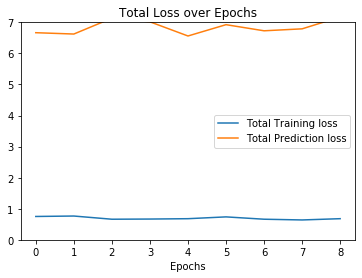

In [115]:
plt.plot(model_4_training.history['loss'])
plt.xlabel('Epochs')
plt.ylim([0, 7])
plt.title('Total Loss over Epochs')
plt.plot(model_4_training.history['val_loss'])
plt.legend(['Total Training loss', 'Total Prediction loss'])

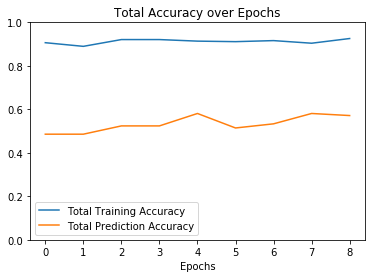

In [116]:
plt.plot(model_4_training.history['Classification_acc'])
plt.xlabel('Epochs')
plt.ylim([0, 1])
plt.title('Total Accuracy over Epochs')
plt.plot(model_4_training.history['val_Classification_acc'])
plt.legend(['Total Training Accuracy', 'Total Prediction Accuracy'])

In [117]:
pd.DataFrame(model_4.predict(X_test_scaled)[1])

,0,1,2
0,0.111890,2.803206e-02,2.566233e-02
1,0.111189,1.780590e-02,3.890917e-02
2,0.113221,6.466779e-02,1.158595e-02
3,0.093997,8.940697e-08,9.997160e-01
4,0.097602,1.251698e-06,9.964485e-01
5,0.118435,6.616455e-01,5.305707e-04
6,0.118965,7.317492e-01,3.899336e-04
7,0.097506,1.192093e-06,9.966745e-01
8,0.107972,2.076685e-03,2.310234e-01
9,0.108896,3.882021e-03,1.438775e-01


In [118]:
y_class_test

,draw,lost,won
397,0,1,0
162,0,0,1
406,0,1,0
142,0,0,1
439,0,1,0
36,0,1,0
72,0,1,0
5,1,0,0
329,0,0,1
48,0,0,1


In [119]:
scaler.fit(pred_df)

pred_df_scaled = scaler.transform(pred_df)


In [128]:
model_4.predict(pred_df_scaled)

[array([[-2.3657598 ],
        [ 0.84803426],
        [-0.08868226],
        [ 3.2852743 ],
        [ 0.1188685 ],
        [-0.4924444 ]], dtype=float32),
 array([[1.40991479e-01, 9.95192409e-01, 1.23977661e-05],
        [1.17477536e-01, 1.95068121e-03, 3.19914222e-01],
        [1.23956263e-01, 5.38972020e-02, 2.12928355e-02],
        [1.01982951e-01, 2.98023224e-07, 9.99285579e-01],
        [1.22494876e-01, 2.62752473e-02, 4.12169099e-02],
        [1.26842260e-01, 1.95975691e-01, 5.75022725e-03]], dtype=float32)]

In [121]:
y_cat.head()

,draw,lost,won
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,1,0,0


In [122]:
pred_df

,year,month,break,homeTotalGoalDiff,guestTotalGoalDiff,homeTeamGoalsDiffAtHome,homeTeamGoalsDiffAway,guestTeamGoalsDiffAtHome,guestTeamGoalsDiffAway,hoamAvgPoints,...,SV Ried,SV Wimpassing,Shkendija Tetovo,Slovan Bratislava,Spartak Moskau,TSV Hartberg,Vitória Guimarães SC,WSG Tirol,Wolfsberger AC,ZSKA Sofia
0,2019,7,7,0.837838,1.309524,0.611111,-0.473684,1.333333,1.285714,1.378378,...,0,0,0,0,0,0,0,0,0,0
1,2019,7,6,0.600000,-0.500000,-0.294118,0.444444,2.000000,-3.000000,1.200000,...,0,0,0,0,0,0,0,1,0,0
2,2019,7,6,0.888889,-0.857143,0.166667,-1.111111,-0.705882,-1.000000,1.166667,...,0,0,0,0,0,0,0,0,0,0
3,2020,7,9,2.283019,-0.117647,2.125000,1.448276,0.058824,-0.294118,2.509434,...,0,0,0,0,0,0,0,0,0,0
4,2019,7,8,0.861111,-0.282051,0.333333,-0.055556,-0.210526,-0.350000,1.527778,...,0,0,0,0,0,0,0,0,0,0
5,2019,7,7,0.648649,0.220000,-0.187500,-0.571429,0.583333,-0.115385,1.216216,...,0,0,0,0,0,0,0,0,0,0


In [124]:
model_4.load_weights("best_model.hdf5")

In [125]:
model_4.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [126]:
model_4.predict(pred_df_scaled)

[array([[-2.3657598 ],
        [ 0.84803426],
        [-0.08868226],
        [ 3.2852743 ],
        [ 0.1188685 ],
        [-0.4924444 ]], dtype=float32),
 array([[1.40991479e-01, 9.95192409e-01, 1.23977661e-05],
        [1.17477536e-01, 1.95068121e-03, 3.19914222e-01],
        [1.23956263e-01, 5.38972020e-02, 2.12928355e-02],
        [1.01982951e-01, 2.98023224e-07, 9.99285579e-01],
        [1.22494876e-01, 2.62752473e-02, 4.12169099e-02],
        [1.26842260e-01, 1.95975691e-01, 5.75022725e-03]], dtype=float32)]

In [139]:
model_4.predict(scaler.fit_transform(df))

[array([[-4.02889061e+00],
        [-7.23635769e+00],
        [ 3.73654032e+00],
        [-1.77014256e+00],
        [-4.49868965e+00],
        [ 2.85714030e+00],
        [ 1.08061671e+00],
        [ 3.55250168e+00],
        [-8.79162550e-01],
        [-6.84345007e-01],
        [ 4.14001369e+00],
        [ 8.56047034e-01],
        [ 1.14345169e+00],
        [-3.22614759e-02],
        [-7.62760103e-01],
        [-4.86745536e-01],
        [ 8.59448016e-01],
        [ 5.62306464e-01],
        [ 1.92188263e+00],
        [ 1.39269114e+00],
        [-1.86445653e+00],
        [-2.65737534e+00],
        [ 1.81852326e-01],
        [-3.12686086e+00],
        [ 1.45455837e+00],
        [ 5.71426809e-01],
        [-3.00525218e-01],
        [ 4.75102854e+00],
        [ 2.76016903e+00],
        [-6.68115497e-01],
        [ 1.75545120e+00],
        [-5.84381670e-02],
        [ 2.12022588e-01],
        [ 2.51920968e-01],
        [ 2.41599774e+00],
        [ 9.90495801e-01],
        [-1.05512714e+00],
 